In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [4]:
df=pd.read_json('dfObs_a02_v04.json');
df=df.sort_index();
len(df)
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [5]:
df.head()

,sents,chapter,entities,chunks,label
0,Chapter 1,1.0,[],[Chapter],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1.0,[],"[the distinction, the first motion, the second or proper motions, the proper motions, the second inequality]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1.0,[],"[The testimony, the ages, the motions, the planets]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1.0,[],"[Reason, experience, their gyrations, perfect circles]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1.0,[],"[figures, it, circles, bodies]",0


In [6]:
df.tail()

,sents,chapter,entities,chunks,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[('Mars', 'PLAN'), ('opposition', 'ASTR'), ('Mars', 'PLAN'), ('Earth', 'PLAN'), ('Sun', 'PLAN'), ('17 hours 20 minutes', 'TIME'), ('Mars', 'PLAN'), ('eastward', 'ASTR'), ('16\' 20""', 'LONG'), ('Sun', 'PLAN'), ('42\' 18""', 'LONG')]","[the position, Mars, opposition, Kepler, the angular distance, Mars, Earth—, the place, the Sun—, 17 hours, Mars, the Sun]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[('longitude', 'ASTR'), ('Mars', 'PLAN'), ('opposition', 'ASTR'), ('198° 37\' 50""', 'LONG'), ('Mars', 'PLAN'), ('orbit', 'ASTR'), ('198° 37\' 10""', 'LONG'), ('18° 37\' 10"" Libra', 'LONG')]","[Kepler, the longitude, Mars, opposition, he, order, Mars's orbit, he, ' 10"" Libra]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[('Sun', 'PLAN'), ('longitude', 'ASTR'), ('observation', 'ASTR'), ('Mars', 'PLAN')]","[The Sun, its longitude, the time, observation, its position, Mars]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[('opposition', 'ASTR'), ('17 hours 20 minutes', 'TIME'), ('March 29', 'DATE'), ('observation', 'ASTR')]","[the time, opposition, 17 hours, March, the observation]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[('opposition', 'ASTR'), ('March 28', 'DATE'), ('4h 23m', 'TIME')]","[Kepler, the time, opposition, March]",0


In [7]:
X = list(df["sents"])

In [8]:
y = np.array(list(df["label"]))

# Distribution of Samples 

In [9]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [10]:
count

{0: 6624, 1: 75}

Text(0.5, 1.0, 'Distribution of samples over different classes')

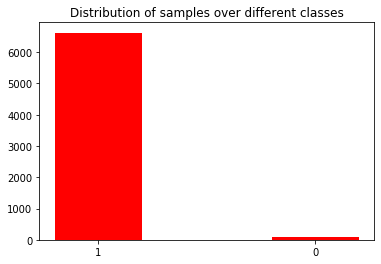

In [11]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [12]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [13]:
#-Random Forest Classifier
trial= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ))])
####################################################
## 01-Random Forest Classifier with weights
class_weight = dict({0:.0069, 1:700000})
trial_01= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ,class_weight=class_weight))])
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [14]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [15]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

## 1- Random Forest 

In [16]:
trial.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [17]:
y_pred=trial.predict(X_test)

In [18]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1659    0]
 [  16    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1659
           1       0.00      0.00      0.00        16

   micro avg       0.99      0.99      0.99      1675
   macro avg       0.50      0.50      0.50      1675
weighted avg       0.98      0.99      0.99      1675



In [19]:
cross_validation_accuracy(trial,X,y,cv=10)

[0.9880775  0.9880775  0.9880775  0.9880775  0.9880597  0.98953662
 0.98953662 0.99103139 0.98953662 0.99103139]
Accuracy of : 0.989 ± 0.002


In [20]:
y_pred = cross_val_predict(trial, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6624
           1       1.00      0.03      0.05        75

   micro avg       0.99      0.99      0.99      6699
   macro avg       0.99      0.51      0.52      6699
weighted avg       0.99      0.99      0.98      6699

[[6624   73]
 [   0    2]]


In [21]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


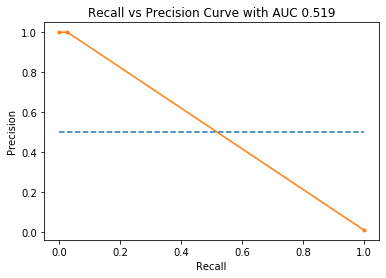

AUC: 0.519


In [22]:
plot_pr(recall, precision)

## 1-SGD

In [23]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [24]:
y_pred=trial_05.predict(X_test)

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1657    2]
 [   7    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1659
           1       0.82      0.56      0.67        16

   micro avg       0.99      0.99      0.99      1675
   macro avg       0.91      0.78      0.83      1675
weighted avg       0.99      0.99      0.99      1675



In [26]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[0.99254844 0.99403875 0.99254844 0.99105812 0.99104478 0.99252616
 0.99103139 0.99252616 0.99252616 0.99103139]
Accuracy of : 0.992 ± 0.002


In [27]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6624
           1       0.72      0.44      0.55        75

   micro avg       0.99      0.99      0.99      6699
   macro avg       0.86      0.72      0.77      6699
weighted avg       0.99      0.99      0.99      6699



In [28]:
print(cm)

[[6611   42]
 [  13   33]]


In [29]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


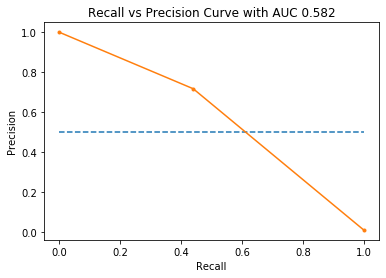

AUC: 0.582


In [30]:
plot_pr(recall, precision)

In [31]:
from eli5 import show_weights
show_weights(trial_05, top=30)

Weight?,Feature
+2.997,30m
+2.591,12h
+2.312,8h
+1.991,on
+1.929,january
+1.909,9h
+1.874,11h
+1.821,7h
+1.809,at
+1.715,october


In [32]:
index_0=list(np.where(y==0))
index_1=list(np.where(y==1))
idx_0=index_0[0].tolist();
idx_1=index_1[0].tolist();

In [33]:
import eli5
eli5.show_prediction(clf, X[idx_1[5]],vec=vec)

In [34]:
eli5.show_prediction(clf, X[idx_1[7]],vec=vec)

In [35]:
eli5.show_prediction(clf, X[idx_0[0]],vec=vec)

In [36]:
eli5.show_prediction(clf, X[idx_0[1]],vec=vec)

# Parameter tununed SGD

In [37]:
param_grid_01= {
    'clf__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e-1, 1e2, 1e3], # learning rate
    'clf__max_iter': [1000], # number of epochs
    'clf__penalty': ['l2'],
    'clf__loss': ['hinge','log'],
    'clf__n_jobs': [-1],
     'clf__tol': [1e-4, 1e-3, 1e-2]
}
trial_05_01 = GridSearchCV(trial_05, param_grid=param_grid_01, cv=5, n_jobs=-1, verbose=2)

In [38]:
trial_05_01.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.1, 100.0, 1000.0], 'clf__max_iter': [1000], 'clf__penalty': ['l2'], 'clf__loss': ['hinge', 'log'], 'clf__n_jobs': [-1], 'clf__tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [39]:
y_pred=trial_05_01.predict(X_test)

In [40]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)

[[1656    3]
 [   7    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1659
           1       0.75      0.56      0.64        16

   micro avg       0.99      0.99      0.99      1675
   macro avg       0.87      0.78      0.82      1675
weighted avg       0.99      0.99      0.99      1675



In [41]:
cross_validation_accuracy(trial_05_01,X,y,cv=10)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.2s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.9s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.9s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   12.9s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


[0.99403875 0.99254844 0.98956781 0.99254844 0.99104478 0.99402093
 0.98953662 0.99252616 0.99252616 0.99103139]
Accuracy of : 0.992 ± 0.003


In [42]:
y_pred = cross_val_predict(trial_05_01, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.2s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.1s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   13.5s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.0s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.7s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.6s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.6s finished


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6624
           1       0.68      0.48      0.56        75

   micro avg       0.99      0.99      0.99      6699
   macro avg       0.84      0.74      0.78      6699
weighted avg       0.99      0.99      0.99      6699



In [43]:
print(cm)

[[6607   39]
 [  17   36]]


In [44]:
df[df.label==1]

,sents,chapter,entities,chunks,label
967,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows.",10.0,"[('1580 November 12', 'DATE'), ('10h', 'TIME'), ('Mars', 'PLAN'), ('8° 36’ 50”', 'LONG'), ('diurnal', 'ASTR')]","[November, they, Mars, 8°, Gemini2, the horizontal variations, which term, I, the diurnal parallaxes, the refractions, what]",1
977,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6.",10.0,"[('1582 December 28', 'DATE'), ('11h 30m', 'TIME'), ('Mars', 'PLAN'), ('16° 47’ Cancer', 'LONG'), ('observation', 'ASTR')]","[December, 11h, they, Mars, 16° 47’ Cancer]",1
984,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.",10.0,"[('1585 January 31', 'DATE'), ('12h 0m', 'TIME'), ('Mars', 'PLAN'), ('21° 18’ 11” Leo', 'LONG')]","[January, 12h 0m, Mars]",1
992,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo.",10.0,"[('1587 March 7', 'DATE'), ('19h 10m', 'TIME'), ('Mars', 'PLAN'), ('25° 10’ 20” Virgo.', 'LONG')]","[March, they, the position, Mars, the observations, Virgo]",1
997,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10.",10.0,"[('1589 April 15', 'DATE'), ('12h 5m', 'TIME'), ('Mars', 'PLAN'), ('3° 58\' 21"" Scorpio', 'LONG'), ('longitudinal', 'ASTR'), ('parallax', 'ASTR'), ('3° 57’ 11”', 'LONG')]","[April, 12h, they, the position, Mars, 3° 58' 21"" Scorpio, longitudinal parallax, it]",1
...,...,...,...,...,...
6116,"For while the opposition was on the night following January 30, the latitude observed on the 24th, preceding the opposition, was 4° 31', still increasing, while on January 31, 16 hours past opposition, the observed latitude was again 4° 31'.",65.0,"[('opposition', 'ASTR'), ('January 30', 'DATE'), ('latitude', 'ASTR'), ('observed', 'ASTR'), ('opposition', 'ASTR'), (""4° 31'"", 'LONG'), ('January 31', 'DATE'), ('16 hours', 'TIME'), ('opposition', 'ASTR'), ('observed', 'ASTR'), ('latitude', 'ASTR'), (""4° ...","[the opposition, the night, January, the latitude, the 24th, the opposition, 4°, January, 16 hours past opposition, the observed latitude, 4°]",1
6538,"Therefore, at Hven in the year of Christ 139 May 27 at 6h the mean motion was 8s 11° 18' 30"".",69.0,"[('Hven', 'NAME'), ('May 27', 'DATE'), ('6h', 'TIME'), ('11° 18\' 30""', 'LONG')]","[Hven, the year, Christ, 139 May, the mean motion]",1
6541,"But on 159944 May 27 at 6h Mars's mean motion was 0s 0° 47' 30"" from the equinoctial, while the distance of Cor Leonis from that point, as demonstrated by Brahe, was 4s 24° 15' 45"".",69.0,"[('159944 May 27', 'DATE'), ('6h', 'TIME'), ('Mars', 'PLAN'), ('0° 47\' 30""', 'LONG'), ('Cor Leonis', 'STAR'), ('24° 15\' 45""', 'LONG')]","[159944 May, 6h Mars's mean motion, the distance, Cor Leonis, that point, Brahe, 24°]",1
6554,"In the year of Christ 139 Pharmouthi 9, which is February 23, at sunset at 5h 30m, 3h 30m at Hven, the apparent position of the sun was computed as 3° 3' Pisces; therefore, the mean position was 0° 43' Pisces.",69.0,"[('February 23', 'DATE'), ('5h 30m', 'TIME'), ('3h 30m', 'TIME'), ('Hven', 'NAME'), (""3° 3' Pisces"", 'LONG'), (""0° 43' Pisces."", 'LONG')]","[the year, Christ 139 Pharmouthi, February, sunset, 30m, 30m, Hven, the apparent position, the sun, 3° 3' Pisces, the mean position, 0° 43' Pisces]",1
